<center><img src="https://raw.githubusercontent.com/Yorko/mlcourse.ai/master/img/ods_stickers.jpg" />    
## <center>[mlcourse.ai](https://mlcourse.ai) – Open Machine Learning Course 
# <center> Tutorial. Mlxtend.SFS: an easy way to select features
### <center> Author: Anton Gilmanov, @wicker


# 1. Intro

"Feature engineering and feature selection are one of the most important elements of data analysis and machine learning at all". <br> 
<br> 
Your could read such phrase in many articles or books, and it's truth. But why do we need to select features?
<br> 
<br> 

### 1. "Noisy" features

Whatever good data you have, always there are some useful features, that help you to solve the problem and some noisy features - unuseful in your prediction model. Such features are dangerous, because it can lead to overfit. Opposite, quality of your model on hold-out data can be improved by deleting it from the dataset.

### 2. Сomputation problem

If dataset has hundreds or thousands features, fitting estimator, cross-validation or another
computation can take a lot of time. Of course, we can use PCA to reduce dimension of data, but sometimes it's not available for current business-task. It's impossible to explain how business could change "new PCA feature" to reach their goals - it's called "interpretation problem". So, feature selection is useful in this case.

### 3. Feature engineering

Ok, we have good dataset. But we added many custom features ~~to beat Kaggle's baseline~~ and now we are searching how we can select, which features improve quality metric and which not. Hm... We can use L1 regularization, it will move some weights towards 0. But what if we could fit estimator with different subsets of new features, and add one if quality metric is increasing or remove one if quality metric is decreasing, and make sure that solution takes only a couple of lines of code? <br><br> **Mlxtend SequentialFeatureSelector is what we need! **

<p style="text-align: center;">**Everytime we try to select the best features :)**</p>

![Image on web](https://i.giphy.com/media/5yLgoceFO3BdJW1zvFu/giphy.webp)

Well, the informal intro is coming to an end. It's time to understand some formalized theory.

# 2. Introduce to SequentialFeatureSelector

Please, install some libraries, if you haven't it in your system

In [1]:
#!pip install pandas
#!pip install mlxtend
#!pip install scikit-learn
#!pip install matplotlib

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from mlxtend.feature_selection import SequentialFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

Mlxtend SequentialFeatureSelector is greedy search algorithm that is used to reduce an initial d-dimensional feature space to a k-dimensional feature subspace where k < d.

There are 4 different flavors of SFAs available via the *SequentialFeatureSelector*:

* Sequential Forward Selection (SFS)
* Sequential Backward Selection (SBS)
* Sequential Forward Floating Selection (SFFS)
* Sequential Backward Floating Selection (SBFS)

In "forward" algorithm we start with no features in our subset and add one feature on each iteration, that maximize quality metric. In the contrary, "backward" algorithm start with full subset of features and remove one feature on each iteration maximizing quality of our model.

The floating variants, SFFS and SBFS, can be considered as extensions to the simpler SFS and SBS algorithms. The floating algorithms have an additional exclusion or inclusion step to remove features once they were included (or excluded), so that a larger number of feature subset combinations can be sampled.

Lets take a look at each of them.

## Sequential Forward Selection (SFS)


### Input: 

Y={y<sub>1</sub>,y<sub>2</sub>,...,y<sub>d</sub>}

* The SFS algorithm takes the whole d-dimensional feature set as input.

### Output: 

X<sub>k</sub>={x<sub>j</sub>|j=1,2,...,k;x<sub>j</sub>∈Y}, where k=(0,1,2,...,d)

* SFS returns a subset of features; the number of selected features k, where k<d, has to be specified a priori.

### Initialization: 

X<sub>0</sub>=∅, k=0

* We initialize the algorithm with an empty set ∅ ("null set") so that k=0 (where k is the size of the subset).


### Step 1 (Inclusion):

x<sup>+</sup> = arg max J(x<sub>k</sub>+x), where x∈Y−X<sub>k</sub>

X<sub>k+1</sub>=X<sub>k</sub>+x<sup>+</sup>

k=k+1 

#### Go to Step 1

* In this step, we add an additional feature, x<sup>+</sup>, to our feature subset X<sub>k</sub>.
* x<sup>+</sup> is the feature that maximizes our criterion function, that is, the feature that is associated with the best classifier performance if it is added to X<sub>k</sub>.
* We repeat this procedure until the termination criterion is satisfied.

### Termination: 
k=p

We add features from the feature subset Xk until the feature subset of size k contains the number of desired features p that we specified a priori.

___

## Sequential Backward Selection (SBS)

### Input: 

The set of all features: Y={y<sub>1</sub>,y<sub>2</sub>,...,y<sub>d</sub>}

* The SBS algorithm takes the whole feature set as input.

### Output: 

X<sub>k</sub>={x<sub>j</sub>|j=1,2,...,k;x<sub>j</sub>∈Y}, where k=(0,1,2,...,d)

* SBS returns a subset of features; the number of selected features k, where k<d, has to be specified a priori.

### Initialization: 

X<sub>0</sub>=Y, k=d

* We initialize the algorithm with the given feature set so that the k=d.


### Step 1 (Exclusion):

x<sup>-</sup>= arg max J(x<sub>k</sub>-x), where x∈X<sub>k </sub>

X<sub>k-1</sub>=X<sub>k</sub>-x<sup>-</sup>

k=k-1 

#### Go to Step 1

* In this step, we remove a feature, x<sup>-</sup> from our feature subset X<sub>k</sub>.
* x<sup>-</sup> is the feature that maximizes our criterion function upon removal, that is, the feature that is associated with the best classifier performance if it is removed from X<sub>k</sub>.
* We repeat this procedure until the termination criterion is satisfied.

### Termination: 

k=p

We remove features from the feature subset X<sub>k</sub> until the feature subset of size k contains the number of desired features p that we specified a priori

***

## Sequential Forward Floating Selection (SFFS)

### Input: 

The set of all features: Y={y<sub>1</sub>,y<sub>2</sub>,...,y<sub>d</sub>}

* The SFFS algorithm takes the whole feature set as input

### Output: 

X<sub>k</sub>={x<sub>j</sub>|j=1,2,...,k;x<sub>j</sub>∈Y}, where k=(0,1,2,...,d)

* The returned output of the algorithm is a subset of the feature space of a specified size.

### Initialization: 

X<sub>0</sub>=∅, k=0

* We initialize the algorithm with an empty set ("null set") so that the k = 0 (where k is the size of the subset) 


### Step 1 (Inclusion):

x<sup>+</sup>= arg max J(x<sub>k</sub>+x), where x∈Y−X<sub>k </sub>

X<sub>k+1</sub>=X<sub>k</sub>+x<sup>+</sup>

k=k+1 

#### Go to Step 2

In step 1, we include the feature from the feature space that leads to the best performance increase for our feature subset (assessed by the criterion function). Then, we go over to step 2.

### Step 2 (Conditional Exclusion):

x<sup>-</sup>= arg max J(x<sub>k</sub>-x), where x∈X<sub>k</sub>

if J(x<sub>k</sub> - x) > J(x<sub>k</sub>):

&nbsp;&nbsp;&nbsp;X<sub>k-1</sub>=X<sub>k</sub>-x<sup>-</sup> 

&nbsp;&nbsp;&nbsp;k=k-1 
     
#### Go to Step 1

In step 2, we only remove a feature if the resulting subset would gain an increase in performance. If k=2 or an improvement cannot be made (i.e., such feature x<sup>-</sup> cannot be found), go back to step 1; else, repeat this step.

Steps 1 and 2 are repeated until the Termination criterion is reached.

### Termination: 

k=p

We add features from the feature subset X<sub>k</sub> until the feature subset of size k contains the number of desired features p that we specified a priori.

***

## Sequential Backward Floating Selection (SBFS)

### Input: 

The set of all features: Y={y<sub>1</sub>,y<sub>2</sub>,...,y<sub>d</sub>}

* The SBFS algorithm takes the whole feature set as input.

### Output: 

X<sub>k</sub>={x<sub>j</sub>|j=1,2,...,k;x<sub>j</sub>∈Y}, where k=(0,1,2,...,d)

* SBFS returns a subset of features; the number of selected features k, where k<d, has to be specified a priori.

### Initialization: 

X<sub>0</sub>=Y, k=d

* We initialize the algorithm with the given feature set so that the k=d.


### Step 1 (Exclusion):

x<sup>-</sup>= arg max J(x<sub>k</sub>-x), where x∈X<sub>k </sub>

X<sub>k-1</sub>=X<sub>k</sub>-x<sup>-</sup>

k=k-1 

#### Go to Step 2

* In this step, we remove a feature, x<sup>-</sup> from our feature subset X<sub>k</sub>.
* x<sup>-</sup> is the feature that maximizes our criterion function upon removal, that is, the feature that is associated with the best classifier performance if it is removed from X<sub>k</sub>.

### Step 2 (Conditional Inclusion):

x<sup>+</sup>= arg max J(x<sub>k</sub>+x), where x∈Y−X<sub>k</sub>

if J(x<sub>k</sub> + x<sup>+</sup>) > J(x<sub>k</sub>):

&nbsp;&nbsp;&nbsp;X<sub>k+1</sub>=X<sub>k</sub>+x<sup>+</sup> 

&nbsp;&nbsp;&nbsp;k=k+1 
     
#### Go to Step 1

In Step 2, we search for features that improve the classifier performance if they are added back to the feature subset. If such features exist, we add the feature x<sup>+</sup> for which the performance improvement is maximized. If k=2 or an improvement cannot be made (i.e., such feature x<sup>+</sup> cannot be found), go back to step 1; else, repeat this step.

### Termination: 

k=p

We add features from the feature subset X<sub>k</sub> until the feature subset of size k contains the number of desired features p that we specified a priori.

# 3. SequentialFeatureSelector object

Lets take a look at documentation and parameters of SFS object

**SequentialFeatureSelector**(estimator, k_features=1, forward=True, floating=False, verbose=0, scoring=None, cv=5, n_jobs=1, pre_dispatch='2n_jobs', clone_estimator=True)

Sequential Feature Selection for Classification and Regression.

_**Parameters**_

**estimator** : scikit-learn classifier or regressor

**k_features** : int or tuple or str (default: 1)

Number of features to select, where k_features < the full feature set. A tuple containing a min and max value can be provided, and the SFS will consider return any feature combination between min and max that scored highest in cross-validtion. For example, the tuple (1, 4) will return any combination from 1 up to 4 features instead of a fixed number of features k. A string argument "best" or "parsimonious". If "best" is provided, the feature selector will return the feature subset with the best cross-validation performance. If "parsimonious" is provided as an argument, the smallest feature subset that is within one standard error of the cross-validation performance will be selected.

**forward** : bool (default: True)

Forward selection if True, backward selection otherwise

**floating** : bool (default: False)

Adds a conditional exclusion/inclusion if True.

**verbose** : int (default: 0), level of verbosity to use in logging.

If 0, no output, if 1 number of features in current set, if 2 detailed logging i ncluding timestamp and cv scores at step.

**scoring** : str, callable, or None (default: None)

If None (default), uses 'accuracy' for sklearn classifiers and 'r2' for sklearn regressors. If str, uses a sklearn scoring metric string identifier, for example {accuracy, f1, precision, recall, roc_auc} for classifiers, {'mean_absolute_error', 'mean_squared_error'/'neg_mean_squared_error', 'median_absolute_error', 'r2'} for regressors.

**cv** : int (default: 5)

Integer or iterable yielding train, test splits. If cv is an integer and estimator is a classifier (or y consists of integer class labels) stratified k-fold. Otherwise regular k-fold cross-validation is performed. No cross-validation if cv is None, False, or 0.

**n_jobs** : int (default: 1)

The number of CPUs to use for evaluating different feature subsets in parallel. -1 means 'all CPUs'.

**pre_dispatch** : int, or string (default: '2*n_jobs')

Controls the number of jobs that get dispatched during parallel execution if n_jobs > 1 or n_jobs=-1. Reducing this number can be useful to avoid an explosion of memory consumption when more jobs get dispatched than CPUs can process. This parameter can be: None, in which case all the jobs are immediately created and spawned. Use this for lightweight and fast-running jobs, to avoid delays due to on-demand spawning of the jobs An int, giving the exact number of total jobs that are spawned A string, giving an expression as a function of n_jobs, as in 2*n_jobs

**clone_estimator** : bool (default: True)

Clones estimator if True; works with the original estimator instance if False. Set to False if the estimator doesn't implement scikit-learn's set_params and get_params methods. In addition, it is required to set cv=0, and n_jobs=1.

# 4. Logistic Regression with feature selection by mlxtend.sfs

In this article we will use toy sklearn dataset **"breast_cancer"** (binary classification task). Lets load the dataset and take a look at the data.

In [3]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [4]:
df, y = pd.DataFrame(data=data.data, columns = data.feature_names), data.target 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [6]:
columns = df.columns

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [8]:
sum(y) / len(y)

0.62741652021089633

There are 30 float not-null features and 569 examples. 62,7% of examples have class 1 and 37,3% of examples have class 0. Classes are not very skewed, so accuracy metric is suitable for us.

We will use LogisticRegression as our base algorithm. Firstly, scaling the data. 

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

Then initiating cross-validation object with 5 folds with fixed random_state 

In [10]:
cv = KFold(n_splits=5, shuffle=True, random_state=17)

Checking cv results without parameters tuning

In [11]:
logit = LogisticRegression()
cross_val_score(logit, df_scaled, y, cv = cv).mean()

0.98417947523676441

CV result is **0.984**
It will be our baseline. Trying to beat it with feature selection

We will use Sequential Backward Selection, so toggle **forward** and **floating** parameters to **False**

Sequential Backward Selection means that:

* We will start with all features K (in our dataset K=30)
* On each iteration n we fit estimator with K-n features and keep on K-n subset of features with best scoring

Setting parameter k_features to tuple (1, K), so it will be subset of features in range (1, 30) with best scoring on CV as output of fit_transform method.

In [12]:
logit = LogisticRegression()
sbs = SequentialFeatureSelector(logit, 
           k_features=(1, 30),                  
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv)

There is information about CV scoring on each iteration in log. The best quality we have with subset with 15 and from 17 to 24 features.

In [13]:
X_sbs = sbs.fit_transform(df_scaled, y, custom_feature_names=columns)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished

[2018-12-12 00:08:17] Features: 29/1 -- score: 0.985933861202[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.2s finished

[2018-12-12 00:08:19] Features: 28/1 -- score: 0.985933861202[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.1s finished

[2018-12-12 00:08:20] Features: 27/1 -- score: 0.985933861202[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    1.1s finished

[2018-12-12 00:08:21] Features: 26/1 -- score: 0.985933861202[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    1.0s finished

[

Plotting results:

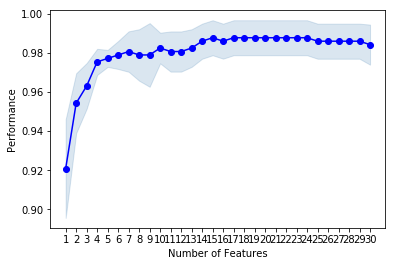

In [14]:
plot_sfs(sbs.get_metric_dict(), kind='std_dev');

SBS returns subset of dataframe with optimal K features

In [15]:
X_sbs.shape

(569, 24)

There is the subset of selected feature names:

In [16]:
sbs.k_feature_names_

('mean radius',
 'mean texture',
 'mean area',
 'mean smoothness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'area error',
 'smoothness error',
 'compactness error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst area',
 'worst smoothness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension')

In [17]:
'The best quality is {} with {} features in dataset'.format(sbs.k_score_, len(sbs.k_feature_idx_))

'The best quality is 0.9877037727061015 with 24 features in dataset'

Quality is increased! ***0.984 -> 0.988***

Saving scores to dict and try another SFS algorithms

In [18]:
sbs_dict = dict()
for i in sbs.subsets_.values():
    sbs_dict[len(i['feature_names'])] = i['avg_score']

***

Now we try to use Sequential Forward Selection, so toggle forward parameter to **True** <br><br>
Sequential Forward Selection means that:

* We will **start with 0 features**
* On each iteration N we fit estimator with N features and keep on N subset of features with best scoring

In [19]:
logit = LogisticRegression()
sfs = SequentialFeatureSelector(logit, 
           k_features=(1, 30), 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='accuracy',
           cv=cv)

In [20]:
X_sfs = sfs.fit_transform(df_scaled, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished

[2018-12-12 00:08:34] Features: 1/30 -- score: 0.920835274026[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s finished

[2018-12-12 00:08:35] Features: 2/30 -- score: 0.954261760596[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished

[2018-12-12 00:08:36] Features: 3/30 -- score: 0.966589038969[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    0.5s finished

[2018-12-12 00:08:36] Features: 4/30 -- score: 0.971867722403[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    0.5s finished

[

Ptotiing results:

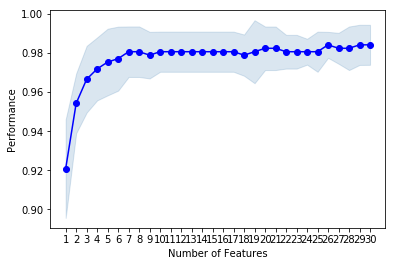

In [21]:
plot_sfs(sfs.get_metric_dict(), kind='std_dev');

In [22]:
'The best quality is {} with {} features in dataset'.format(sfs.k_score_, len(sfs.k_feature_idx_))

'The best quality is 0.9841794752367644 with 30 features in dataset'

Now the quality is equal to our baseline. 

Why quality of SFS is worse, than SBS? 
We use "Forward" algorithm, so on first iteration we select one feature and fit estimator with it. It's obviously, that finding "the best" feature fitting one dimensional dataset is not very effective. More than that, in Sequential Forward Selection we can't remove feature once added. <br><br>Let's try to find, "bad feature" that we add in our dataset once and on what iteration stage this happened.

In [23]:
sbs_feat = set(sbs.subsets_[24]['feature_idx']) #best feature set of SBS algorithm
for i in range(1, 30):
    sfs_feat = set(sfs.subsets_[i]['feature_idx']) #iterate throw feature set on each iteration of SFS algorithm
    if len([x for x in sfs_feat if x not in sbs_feat]) > 0:
        print('We add "bad feature" # {} on {} iteration stage'.format(sfs_feat - sbs_feat, i))
        break

We add "bad feature" # {5} on 8 iteration stage


Save results on each itertaion too

In [24]:
sfs_dict = dict()
for i in sfs.subsets_.values():
    sfs_dict[len(i['feature_names'])] = i['avg_score']

Now we will try to use Sequential Forward Floating Selection, so toggle floating parameter to True. It can help us to remove worst feature at each iteration additional step

In [25]:
logit = LogisticRegression()
sffs = SequentialFeatureSelector(logit, 
           k_features=(1, 30), 
           forward=True, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=cv)

In [26]:
X_sffs = sffs.fit_transform(df_scaled, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.5s finished

[2018-12-12 00:08:49] Features: 1/30 -- score: 0.920835274026[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2018-12-12 00:08:49] Features: 2/30 -- score: 0.954261760596[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2018-12-12 00:08:50] Features: 3/30 -- score: 0.966589038969[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rem

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.6s finished

[2018-12-12 00:09:09] Features: 21/30 -- score: 0.980655177767[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    0.7s finished

[2018-12-12 00:09:10] Features: 22/30 -- score: 0.980655177767[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    0.8s finished

[2018-12-12 00:09:11] Features: 23/30 -- score: 0.978

Plotting results:

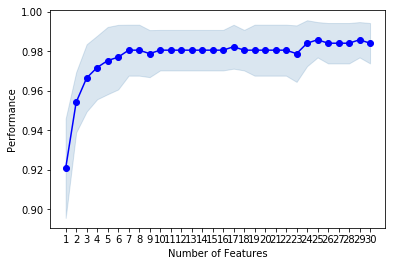

In [27]:
plot_sfs(sffs.get_metric_dict(), kind='std_dev');

In [28]:
'The best quality is {} with {} features in dataset'.format(sffs.k_score_, len(sffs.k_feature_idx_))

'The best quality is 0.9859338612016767 with 25 features in dataset'

The quality is little higher, that SFS one, but SBS is the best algortihm today. Saving results to dict and lets try the last implementation - Sequential Backward Floating Selection

In [29]:
sffs_dict = dict()
for i in sffs.subsets_.values():
    sffs_dict[len(i['feature_names'])] = i['avg_score']

In [30]:
logit = LogisticRegression()
sbfs = SequentialFeatureSelector(logit, 
           k_features=(1, 30), 
           forward=False, 
           floating=True, 
           verbose=2,
           scoring='accuracy',
           cv=cv)

In [31]:
X_sbfs = sbfs.fit_transform(df_scaled, y)

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    1.3s finished

[2018-12-12 00:09:32] Features: 29/1 -- score: 0.985933861202[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    1.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished

[2018-12-12 00:09:33] Features: 28/1 -- score: 0.985933861202[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    1.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s finished

[2018-12-12 00:09:35] Features: 27/1 -- score: 0.985933861202[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s rem

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.4s finished

[2018-12-12 00:09:57] Features: 10/1 -- score: 0.984163949697[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    0.5s finished

[2018-12-12 00:09:58] Features: 10/1 -- score: 0.984163949697[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    

Ploting results:

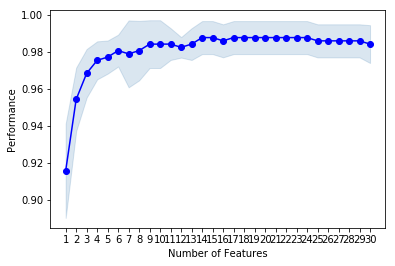

In [32]:
plot_sfs(sbfs.get_metric_dict(), kind='std_dev');

In [33]:
'The best quality is {} with {} features in dataset'.format(sbfs.k_score_, len(sbfs.k_feature_idx_))

'The best quality is 0.9877037727061015 with 24 features in dataset'

The quality of SBS and SBFS algorithms is equal in our example. But sometimes it increased.

In [34]:
sbfs_dict = dict()
for i in sbfs.subsets_.values():
    sbfs_dict[len(i['feature_names'])] = i['avg_score']

# 5. Comparing results with RFE and PCA

Trying another feature selection and dimensional reducing algorithms

In [35]:
dict_pca = dict()
for i in range(1, 31):
    pca = PCA(n_components = i)
    df_pca = pca.fit_transform(df_scaled, y)
    logit = LogisticRegression()
    score = cross_val_score(logit, df_pca, y, cv = cv).mean()
    dict_pca[i] = score

In [36]:
'The best quality is {} with {} features in dataset'.format(max(dict_pca.values()), max(dict_pca, key=dict_pca.get))

'The best quality is 0.9841794752367644 with 18 features in dataset'

Accuracy metric is lower on PCA dataset

In [37]:
dict_rfe = dict()
for i in range(1, 31):
    rfe = RFE(logit, n_features_to_select=i)
    df_rfe = rfe.fit_transform(df_scaled, y)
    logit = LogisticRegression()
    score = cross_val_score(logit, df_rfe, y, cv = cv).mean()
    dict_rfe[i] = score

In [38]:
'The best quality is {} with {} features in dataset'.format(max(dict_rfe.values()), max(dict_rfe, key=dict_rfe.get))

'The best quality is 0.9841794752367644 with 24 features in dataset'

RFE quality is lower too. RFE is computationally less complex using the feature weight coefficients (e.g., linear models) or feature importance (tree-based algorithms) to eliminate features recursively, whereas SFSs eliminate (or add) features based on a user-defined classifier/regression performance metric.

Comparing CV scores of all algorithms

In [39]:
pd.DataFrame(data = [pd.Series(dict_rfe),pd.Series(dict_pca), pd.Series(sbs_dict)], index = ['RFE', 'PCA', 'SBS']).T

,RFE,PCA,SBS
1,0.920835,0.913818,0.920835
2,0.950815,0.950753,0.954262
3,0.949045,0.947291,0.963080
4,0.945521,0.968374,0.975376
5,0.970144,0.973591,0.977146
6,0.968374,0.975392,0.978885
7,0.968359,0.975392,0.980640
8,0.970129,0.978885,0.978901
9,0.966605,0.982425,0.978916
10,0.968390,0.980655,0.982441


Maximum score we got with SBS and minimum 15 features in subset. RFE is worse with any number of features. PCA is better only with 9 features in subset. RFE and PCA could not find subset of features with score more than full dataset's score. SBS del with it.

<p style="text-align: center;">**How we will choose features after this tutorial :)**</p>

<img src="https://habrastorage.org/webt/qv/im/rh/qvimrh3gi_9ijg0crtkww0dhbaa.jpeg" />

 Of course, RFE, PCA and SBS solve slightly different tasks. It's important to know how and when we should implement one or another instrument. And more important is to have an inquiring mind 
and test the craziest hypotheses :)

# Conclusion 

In this tutorial we studied something new about feature selection, understood how SequentialFeatureSelector from Mlxtend library works - it allows very easy selection from new generated features and boost model's quality. Then we compared it with another feature selection and dimension reducing algorithms. <br><br>
Beginners data scientists often pay a little attention to feature selection and trying to testing many different models instead. But feature selection can boost model score very much. It's near impossible to get top Kaggle without ~~stacking xgboost~~ careful feature engineering and selecting best features.

Save the best, delete the rest! That's all, folks!

### Featured links
Official Mlxtend Docs https://rasbt.github.io/mlxtend/user_guide/feature_selection/SequentialFeatureSelector